# Import Libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

%matplotlib inline

# Loading the Data:

In [2]:
df = pd.read_csv('data/final_data.csv')

In [3]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


# Data Preprocessing:

In [4]:
temp = df[['goals', 'assists', 'clean sheets', 'goals conceded', 'yellow cards', 'second yellow cards', 'red cards', 'minutes played']].copy()
temp.iloc[:, :-1] = temp.iloc[:, :-1].apply(lambda x: x * (temp['minutes played'] / 90))
temp.head()

,goals,assists,clean sheets,goals conceded,yellow cards,second yellow cards,red cards,minutes played
0,0.0,0.0,35.0,127.0,1.0,0.0,0.0,9390
1,0.0,0.0,3.0,18.0,1.0,0.0,0.0,1304
2,0.0,0.0,3.0,2.0,0.0,0.0,0.0,292
3,2.0,4.0,0.0,0.0,16.0,0.0,0.0,6408
4,1.0,1.0,0.0,0.0,3.0,0.0,0.0,5031


In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.rename(columns={
    'goals': 'goals_per_90',
    'assists': 'assists_per_90',
    'clean sheets': 'clean_sheets_per_90',
    'goals conceded': 'goals_conceded_per_90',
    'yellow cards': 'yellow_cards_per_90',
    'second yellow cards': 'second_yellow_cards_per_90',
    'red cards': 'red_cards_per_90',
    'minutes played': 'minutes_played_per_90'
}, inplace=True)
df.head()

,player,team,name,position,height,age,appearance,goals_per_90,assists_per_90,yellow_cards_per_90,...,goals_conceded_per_90,clean_sheets_per_90,minutes_played_per_90,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000,32.000,104,0.000,0.000,0.010,...,1.217,0.335,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000,30.000,15,0.000,0.000,0.069,...,1.242,0.207,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000,37.000,4,0.000,0.000,0.000,...,0.616,0.925,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000,25.000,82,0.028,0.056,0.225,...,0.000,0.000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000,30.000,63,0.018,0.018,0.054,...,0.000,0.000,5031,238,51,21,40000000,80000000,2,0


In [6]:
df = pd.concat([df, temp], axis=1)
df.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90',
                     'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 
                     'minutes played', 'position_encoded' ],axis=1, inplace=True)
df = df.loc[:,~df.columns.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   days_injured         10754 non-null  int64  
 8   games_injured        10754 non-null  int64  
 9   award                10754 non-null  int64  
 10  current_value        10754 non-null  int64  
 11  highest_value        10754 non-null  int64  
 12  goals                10754 non-null  float64
 13  assists              10754 non-null  float64
 14  clean sheets         10754 non-null  float64
 15  goals conceded       10754 non-null 

In [7]:
df['position'] = df['position'].apply(lambda x: x.split('-')[0]).apply(lambda x: x.split(' ')[0])
df['position'].unique()

array(['Goalkeeper', 'Defender', 'midfield', 'Attack'], dtype=object)

In [8]:
df.drop(['player', 'name'], axis=1, inplace=True)

In [9]:
df['team'].value_counts()

team
Daejeon Hana Citizen      46
Jeonbuk Hyundai Motors    46
FC Seoul                  45
Gangwon FC                43
Daegu FC                  42
                          ..
FC Barcelona              22
Atlético de Madrid        22
CA Osasuna                22
Hatayspor                 12
Gaziantep FK               6
Name: count, Length: 374, dtype: int64

In [10]:
df = df[df['team'] != 'Gaziantep FK']

In [11]:
df.shape

(10748, 17)

# Model Building:

## Feature Engineering:

In [12]:
df = pd.get_dummies(df, columns=['team'])

In [13]:
df.shape

(10748, 389)

In [14]:
df_gk = df[df['position'] == 'Goalkeeper'].drop('position', axis=1)
df_def = df[df['position'] == 'Defender'].drop('position', axis=1)
df_mid = df[df['position'] == 'midfield'].drop('position', axis=1)
df_fwd = df[df['position'] == 'Attack'].drop('position', axis=1)

In [15]:
df_gk.shape, df_def.shape, df_mid.shape, df_fwd.shape

((1228, 388), (3528, 388), (3091, 388), (2901, 388))

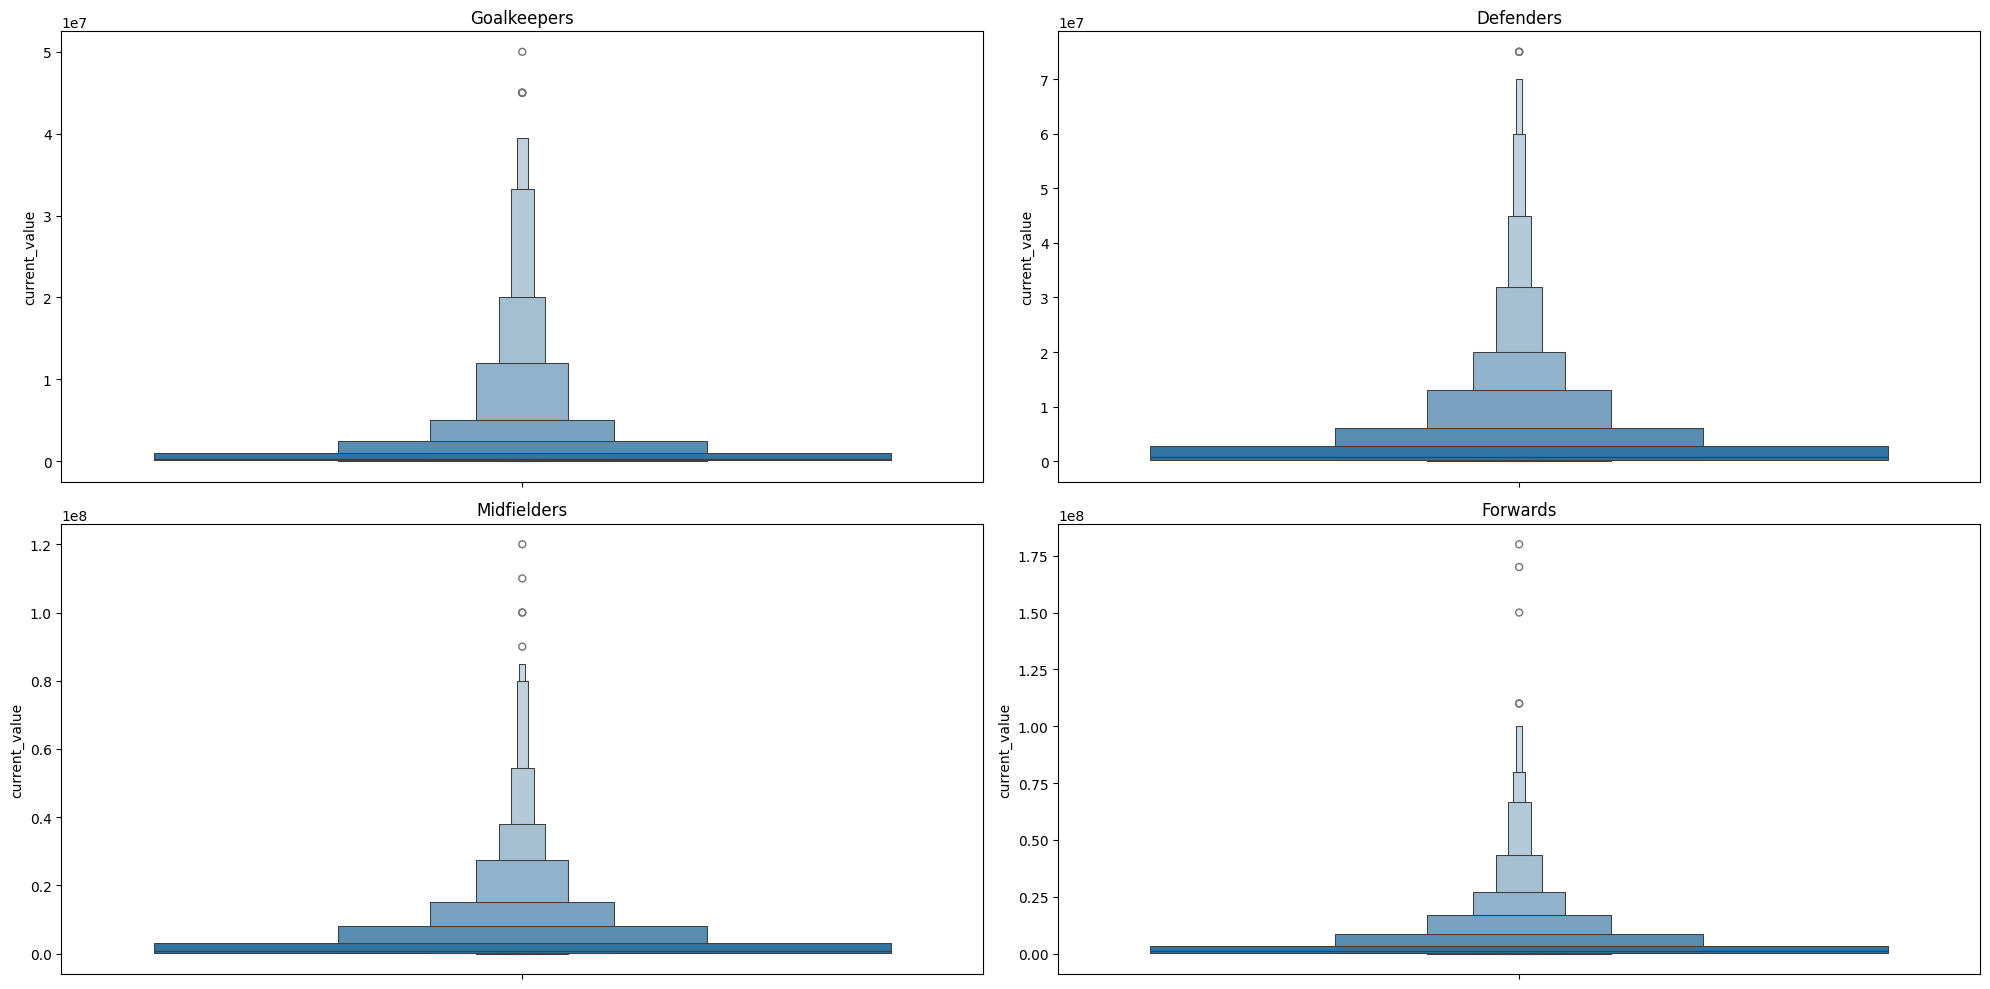

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(20, 10))

sns.boxenplot(y=df_gk['current_value'], ax=ax[0, 0])
ax[0, 0].set_title('Goalkeepers')

sns.boxenplot(y=df_def['current_value'], ax=ax[0, 1])
ax[0, 1].set_title('Defenders')

sns.boxenplot(y=df_mid['current_value'], ax=ax[1, 0])
ax[1, 0].set_title('Midfielders')

sns.boxenplot(y=df_fwd['current_value'], ax=ax[1, 1])
ax[1, 1].set_title('Forwards')

plt.tight_layout()
plt.show()


Based on the graphs, we will categorize the prices into three levels: low, medium, and high, using the following thresholds:

### Goalkeepers:
- **Low:** 0 - 2,500,000
- **Medium:** 2,500,000 - 10,000,000
- **High:** 10,000,000+

### Defenders:
- **Low:** 0 - 10,000,000
- **Medium:** 10,000,000 - 20,000,000
- **High:** 20,000,000+

### Midfielders:
- **Low:** 0 - 10,000,000
- **Medium:** 10,000,000 - 20,000,000
- **High:** 20,000,000+

### Forwards:
- **Low:** 0 - 12,500,000
- **Medium:** 12,500,000 - 30,000,000
- **High:** 30,000,000+



In [18]:
bins_goalkeepers = [0, 2500000, 10000000, float('inf')]
bins_defenders = [0, 10000000, 20000000, float('inf')]
bins_midfielders = [0, 10000000, 20000000, float('inf')]
bins_forwards = [0, 12500000, 50000000, float('inf')]

labels = ['Low', 'Medium', 'High']

In [19]:
df_gk['value_category'] = pd.cut(df_gk['current_value'], bins=bins_goalkeepers, labels=labels, right=False)
df_def['value_category'] = pd.cut(df_def['current_value'], bins=bins_defenders, labels=labels, right=False)
df_mid['value_category'] = pd.cut(df_mid['current_value'], bins=bins_midfielders, labels=labels, right=False)
df_fwd['value_category'] = pd.cut(df_fwd['current_value'], bins=bins_forwards, labels=labels, right=False)


In [20]:
df_gk.drop('current_value', axis=1, inplace=True)
df_def.drop('current_value', axis=1, inplace=True)
df_mid.drop('current_value', axis=1, inplace=True)
df_fwd.drop('current_value', axis=1, inplace=True)

In [21]:
df_gk['value_category'].value_counts(), df_def['value_category'].value_counts(), df_mid['value_category'].value_counts(), df_fwd['value_category'].value_counts()

(value_category
 Low       1066
 Medium     113
 High        49
 Name: count, dtype: int64,
 value_category
 Low       3227
 Medium     160
 High       141
 Name: count, dtype: int64,
 value_category
 Low       2769
 Medium     163
 High       159
 Name: count, dtype: int64,
 value_category
 Low       2655
 Medium     203
 High        43
 Name: count, dtype: int64)

In [22]:
encoder = LabelEncoder()
df_gk['value_category_encoded'] = encoder.fit_transform(df_gk['value_category'])  
df_def['value_category_encoded'] = encoder.fit_transform(df_def['value_category'])
df_mid['value_category_encoded'] = encoder.fit_transform(df_mid['value_category'])
df_fwd['value_category_encoded'] = encoder.fit_transform(df_fwd['value_category'])

In [24]:
numeric_cols = df_gk.select_dtypes(include=[float, int]).columns

# Calculate the correlation matrix
correlation_gk = df_gk[numeric_cols].corr()

# Print the correlation with the encoded value category
print(correlation_gk['value_category_encoded'].sort_values(ascending=False))

value_category_encoded    1.000
days_injured              0.074
games_injured             0.073
red cards                 0.063
award                     0.050
age                       0.043
goals conceded            0.033
goals                     0.001
appearance               -0.004
height                   -0.014
second yellow cards      -0.019
yellow cards             -0.023
clean sheets             -0.056
highest_value            -0.209
assists                     NaN
Name: value_category_encoded, dtype: float64


In [26]:
# Select only numeric columns for correlation calculation
numeric_cols = df_def.select_dtypes(include=[float, int]).columns

# Calculate the correlation matrix
correlation_def = df_def[numeric_cols].corr()

# Print the correlation with the encoded value category
print(correlation_def['value_category_encoded'].sort_values(ascending=False))


value_category_encoded    1.000
second yellow cards       0.006
red cards                 0.000
yellow cards             -0.002
age                      -0.004
days_injured             -0.017
height                   -0.019
games_injured            -0.020
assists                  -0.026
appearance               -0.034
award                    -0.058
goals                    -0.069
highest_value            -0.245
clean sheets                NaN
goals conceded              NaN
Name: value_category_encoded, dtype: float64


In [28]:
# Ensure only numeric columns are used for correlation calculation
numeric_cols = df_mid.select_dtypes(include=[float, int]).columns

# Calculate the correlation matrix
correlation_mid = df_mid[numeric_cols].corr()

# Print the correlation with the encoded value category
print(correlation_mid['value_category_encoded'].sort_values(ascending=False))

value_category_encoded    1.000
age                       0.017
second yellow cards       0.012
days_injured              0.005
games_injured             0.004
red cards                 0.001
height                   -0.020
award                    -0.044
yellow cards             -0.065
appearance               -0.085
goals                    -0.094
assists                  -0.105
highest_value            -0.272
clean sheets                NaN
goals conceded              NaN
Name: value_category_encoded, dtype: float64


In [30]:
# Select only numeric columns for correlation calculation
numeric_cols = df_fwd.select_dtypes(include=[float, int]).columns

# Ensure that 'value_category_encoded' is in the list of numeric columns
if 'value_category_encoded' not in numeric_cols:
    numeric_cols = numeric_cols.append(pd.Index(['value_category_encoded']))

# Calculate the correlation matrix
correlation_fwd = df_fwd[numeric_cols].corr()

# Print the correlation with the encoded value category
print(correlation_fwd['value_category_encoded'].sort_values(ascending=False))

value_category_encoded    1.000
appearance                0.202
goals                     0.168
assists                   0.146
highest_value             0.123
yellow cards              0.106
award                     0.086
games_injured             0.081
days_injured              0.072
red cards                 0.040
height                    0.025
second yellow cards       0.013
age                      -0.018
clean sheets                NaN
goals conceded              NaN
Name: value_category_encoded, dtype: float64


In [31]:
threshold = 0.1

selected_features_gk = correlation_gk.index[abs(correlation_def['value_category_encoded']) > threshold]
selected_features_def = correlation_def.index[abs(correlation_def['value_category_encoded']) > threshold]
selected_features_mid = correlation_mid.index[abs(correlation_mid['value_category_encoded']) > threshold]
selected_features_fwd = correlation_fwd.index[abs(correlation_fwd['value_category_encoded']) > threshold]

selected_features_gk, selected_features_def, selected_features_mid, selected_features_fwd

(Index(['highest_value', 'value_category_encoded'], dtype='object'),
 Index(['highest_value', 'value_category_encoded'], dtype='object'),
 Index(['highest_value', 'assists', 'value_category_encoded'], dtype='object'),
 Index(['appearance', 'highest_value', 'goals', 'assists', 'yellow cards',
        'value_category_encoded'],
       dtype='object'))

In [32]:
df_gk = df_gk[selected_features_gk]
df_def = df_def[selected_features_def]
df_mid = df_mid[selected_features_mid]
df_fwd = df_fwd[selected_features_fwd]

In [33]:
df_fwd.head()

,appearance,highest_value,goals,assists,yellow cards,value_category_encoded
23,88,85000000,35.000,13.000,5.000,0
24,79,130000000,12.000,6.000,0.000,0
25,63,25000000,8.000,7.000,1.000,2
26,72,25000000,21.000,12.000,9.000,2
27,80,75000000,22.000,15.000,12.000,0


## Data Preparation:

In [34]:
X_gk = df_gk.drop('value_category_encoded', axis=1)
y_gk = df_gk['value_category_encoded']

X_def = df_def.drop('value_category_encoded', axis=1)
y_def = df_def['value_category_encoded']

X_mid = df_mid.drop('value_category_encoded', axis=1)
y_mid = df_mid['value_category_encoded']

X_fwd = df_fwd.drop('value_category_encoded', axis=1)
y_fwd = df_fwd['value_category_encoded']

X_train_gk, X_test_gk, y_train_gk, y_test_gk = train_test_split(X_gk, y_gk, test_size=0.2, random_state=42)
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X_def, y_def, test_size=0.2, random_state=42)
X_train_mid, X_test_mid, y_train_mid, y_test_mid = train_test_split(X_mid, y_mid, test_size=0.2, random_state=42)
X_train_fwd, X_test_fwd, y_train_fwd, y_test_fwd = train_test_split(X_fwd, y_fwd, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_gk = scaler.fit_transform(X_train_gk)
X_test_gk = scaler.transform(X_test_gk)

X_train_def = scaler.fit_transform(X_train_def)
X_test_def = scaler.transform(X_test_def)

X_train_mid = scaler.fit_transform(X_train_mid)
X_test_mid = scaler.transform(X_test_mid)

X_train_fwd = scaler.fit_transform(X_train_fwd)
X_test_fwd = scaler.transform(X_test_fwd)

# Model Building:

### step 1 :crate object and assign the model 

In [35]:
model_gk = SVC()
model_def = SVC()
model_mid = SVC()
model_fwd = SVC()

### cross validation to find best parameter  

In [37]:
param_grid = {
    'kernel': ['rbf'], 
    'C':[20,30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
}
grid_search_gk = GridSearchCV(estimator=model_gk,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

grid_search_def = GridSearchCV(estimator=model_def,
                            param_grid=param_grid,
                            cv=5,
                            scoring='f1_macro', 
                            verbose=1)

grid_search_mid = GridSearchCV(estimator=model_mid,
                            param_grid=param_grid,
                            cv=5,
                            scoring='f1_macro', 
                            verbose=1)

grid_search_fwd = GridSearchCV(estimator=model_fwd,
                            param_grid=param_grid,
                            cv=5,
                            scoring='f1_macro', 
                            verbose=1)

# Data Preprocessing:

## Model Training:

In [38]:
grid_search_gk.fit(X_train_gk, y_train_gk)
grid_search_def.fit(X_train_def, y_train_def)
grid_search_mid.fit(X_train_mid, y_train_mid)
grid_search_fwd.fit(X_train_fwd, y_train_fwd)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120],
                         'kernel': ['rbf']},
             scoring='f1_macro', verbose=1)

In [39]:
grid_search_gk.best_params_, grid_search_def.best_params_, grid_search_mid.best_params_, grid_search_fwd.best_params_

({'C': 100, 'kernel': 'rbf'},
 {'C': 40, 'kernel': 'rbf'},
 {'C': 50, 'kernel': 'rbf'},
 {'C': 50, 'kernel': 'rbf'})

In [40]:
model_gk = grid_search_gk.best_estimator_
model_def = grid_search_def.best_estimator_
model_mid = grid_search_mid.best_estimator_
model_fwd = grid_search_fwd.best_estimator_

## Model Testing:

In [41]:
y_pred_gk = model_gk.predict(X_test_gk)
y_pred_def = model_def.predict(X_test_def)
y_pred_mid = model_mid.predict(X_test_mid)
y_pred_fwd = model_fwd.predict(X_test_fwd)

# Model Evaluation:

### Base Model:

In [42]:
base_model_gk = round(df_gk['value_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model_def = round(df_def['value_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model_mid = round(df_mid['value_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)
base_model_fwd = round(df_fwd['value_category_encoded'].value_counts()[1]/df.shape[0]*100, 2)

base_model_gk, base_model_def, base_model_mid, base_model_fwd

(9.92, 30.02, 25.76, 24.7)

### Accuracy:  

In [43]:
accuracy_gk = accuracy_score(y_test_gk, y_pred_gk)
accuracy_def = accuracy_score(y_test_def, y_pred_def)
accuracy_mid = accuracy_score(y_test_mid, y_pred_mid)
accuracy_fwd = accuracy_score(y_test_fwd, y_pred_fwd)

accuracy_gk, accuracy_def, accuracy_mid, accuracy_fwd

(0.8861788617886179,
 0.9291784702549575,
 0.9046849757673667,
 0.9294320137693631)

### Confusion Matrix:

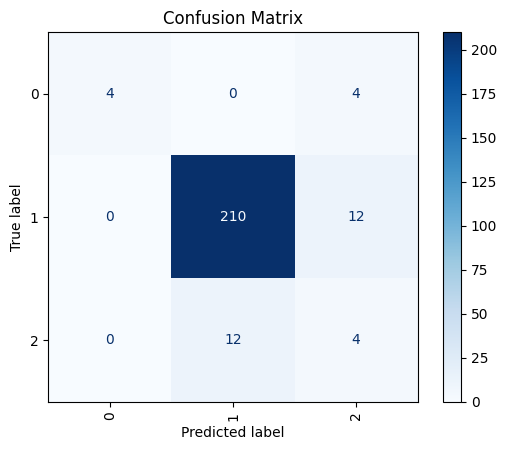

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test_gk, y_pred_gk,
                                        display_labels=model_gk.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

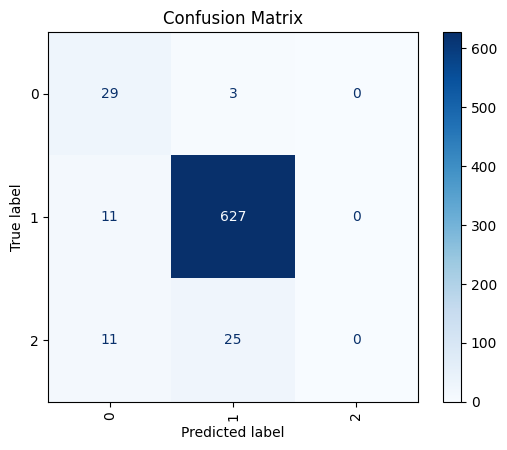

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test_def, y_pred_def,
                                        display_labels=model_def.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

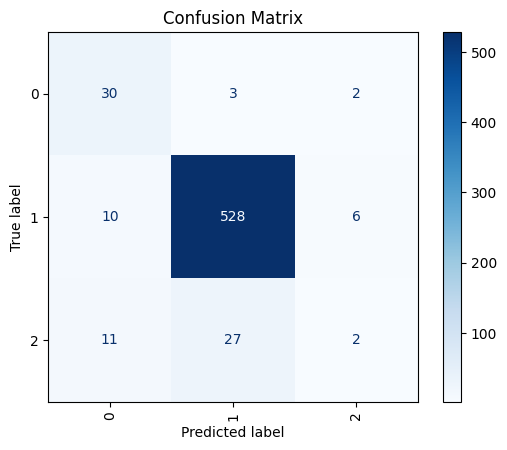

In [46]:
ConfusionMatrixDisplay.from_predictions(y_test_mid, y_pred_mid,
                                        display_labels=model_mid.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

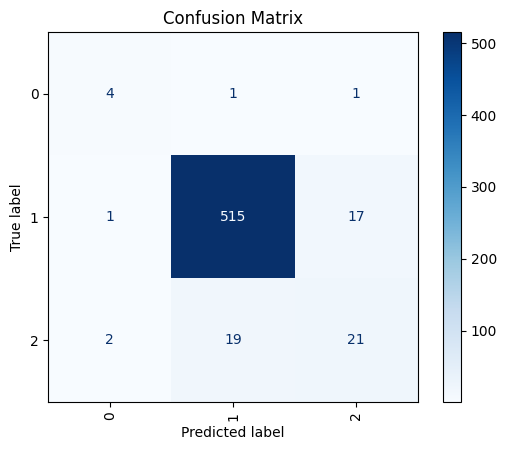

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test_fwd, y_pred_fwd,
                                        display_labels=model_fwd.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

### Percision:

In [48]:
percision_gk = precision_score(y_test_gk, y_pred_gk, average='weighted')
percision_def = precision_score(y_test_def, y_pred_def, average='weighted')
percision_mid = precision_score(y_test_mid, y_pred_mid, average='weighted')
percision_fwd = precision_score(y_test_fwd, y_pred_fwd, average='weighted')

percision_gk, percision_def, percision_mid, percision_fwd

(0.8991869918699187,
 0.8908254900688731,
 0.8777720896060754,
 0.9279151848521452)

### Recall:

In [49]:
recall_gk = recall_score(y_test_gk, y_pred_gk, average='weighted')
recall_def = recall_score(y_test_def, y_pred_def, average='weighted')
recall_mid = recall_score(y_test_mid, y_pred_mid, average='weighted')
recall_fwd = recall_score(y_test_fwd, y_pred_fwd, average='weighted')

recall_gk, recall_def, recall_mid, recall_fwd

(0.8861788617886179,
 0.9291784702549575,
 0.9046849757673667,
 0.9294320137693631)

### F1 Score:

In [51]:
F1_gk = f1_score(y_test_gk, y_pred_gk, average='weighted')
F1_def = f1_score(y_test_def, y_pred_def, average='weighted')
F1_mid = f1_score(y_test_mid, y_pred_mid, average='weighted')
F1_fwd = f1_score(y_test_fwd, y_pred_fwd, average='weighted')

F1_gk, F1_def, F1_mid, F1_fwd

(0.8897922312556459, 0.908098904098546, 0.8867702757001978, 0.928581180713305)